In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [105]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [106]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

In [108]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [115]:
x_test

array([[0.66666667, 0.05185185],
       [0.97619048, 0.54074074],
       [0.23809524, 0.21481481],
       [0.71428571, 0.6       ],
       [0.26190476, 0.0962963 ],
       [0.28571429, 0.34814815],
       [0.69047619, 0.68148148],
       [0.26190476, 0.5037037 ],
       [0.52380952, 0.44444444],
       [0.57142857, 0.37037037],
       [0.4047619 , 0.37037037],
       [0.83333333, 0.14074074],
       [0.11904762, 0.24444444],
       [0.04761905, 0.05925926],
       [0.28571429, 0.53333333],
       [0.4047619 , 0.68888889],
       [0.80952381, 0.17037037],
       [0.66666667, 0.43703704],
       [0.5       , 0.2       ],
       [0.9047619 , 0.33333333],
       [0.0952381 , 0.08888889],
       [0.26190476, 0.48148148],
       [0.69047619, 0.05925926],
       [0.97619048, 0.45185185],
       [0.02380952, 0.02962963],
       [0.78571429, 0.05925926],
       [0.57142857, 0.48148148],
       [0.45238095, 0.28148148],
       [0.88095238, 0.81481481],
       [0.02380952, 0.04444444],
       [0.

In [109]:
from sklearn.neighbors import KNeighborsClassifier
knnClass = KNeighborsClassifier(n_neighbors=5,weights='distance',metric='minkowski',algorithm='auto',p=2)

In [110]:
knnClass.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [111]:
y_pred = knnClass.predict(x_test)

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[47  5]
 [ 2 26]]


0.9125

c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_228\1596357418.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


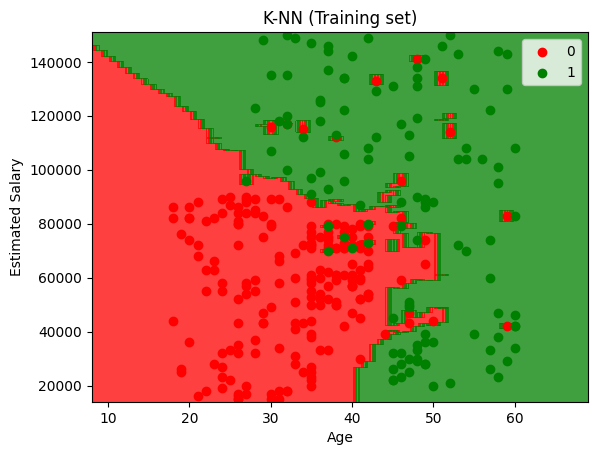

In [113]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knnClass.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

c:\Users\abhinav.aggarwal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\abhinav.aggarwal\AppData\Local\Temp\ipykernel_228\1783529145.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


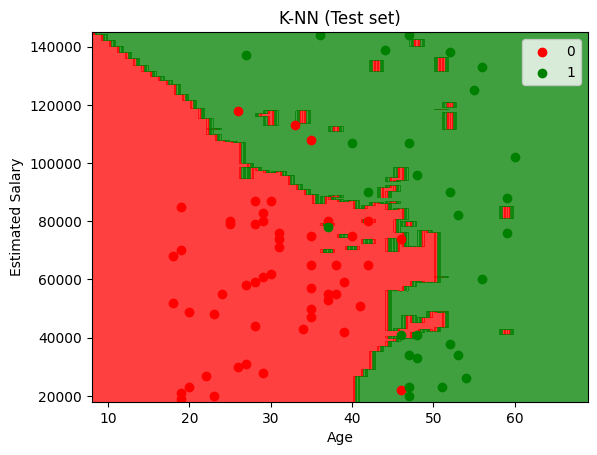

In [114]:
## For test data
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knnClass.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()